# The purpose is to show the Galactic

## Definitions of the libraries

In [2]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [4]:
import pandas as pd
import os
import re

In [5]:
from astroquery.simbad import Simbad

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [7]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [8]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [9]:
dir_star='calspec'
dir_nostar='grid'

In [10]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [11]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[7])

In [12]:
filelist=os.listdir(SEDfile_dir) 

In [13]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

## Find the star-names in the files

In [14]:
obj_headers = []
obj_files = []
for filename in filelist:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [15]:
obj_names = []
index=0
for hdr in obj_headers: 
        obj_name=obj_headers[index]['TARGETID']
        obj_names.append(obj_name)
        index+=1


In [16]:
print obj_names

['Model Spectrum of NGC 7009 Planetary Nebula', 'Orion']


In [17]:
print obj_files

['pn_template.fits', 'orion_template.fits']


In [18]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [19]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

Model Spectrum of NGC 7009 Planetary Nebula : 
pn_template.fits
Orion : 
orion_template.fits


## Plot the SED

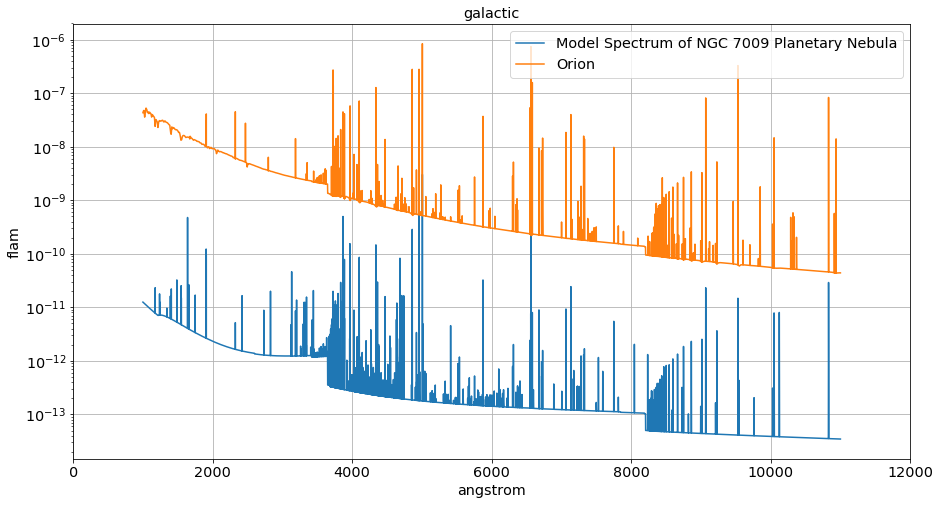

In [20]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("galactic")
    plt.savefig("galactic.png")